## Tugas Akhir Microcredential Associate Data Scientist

### ITS-05 kelompok 3

#### Preface

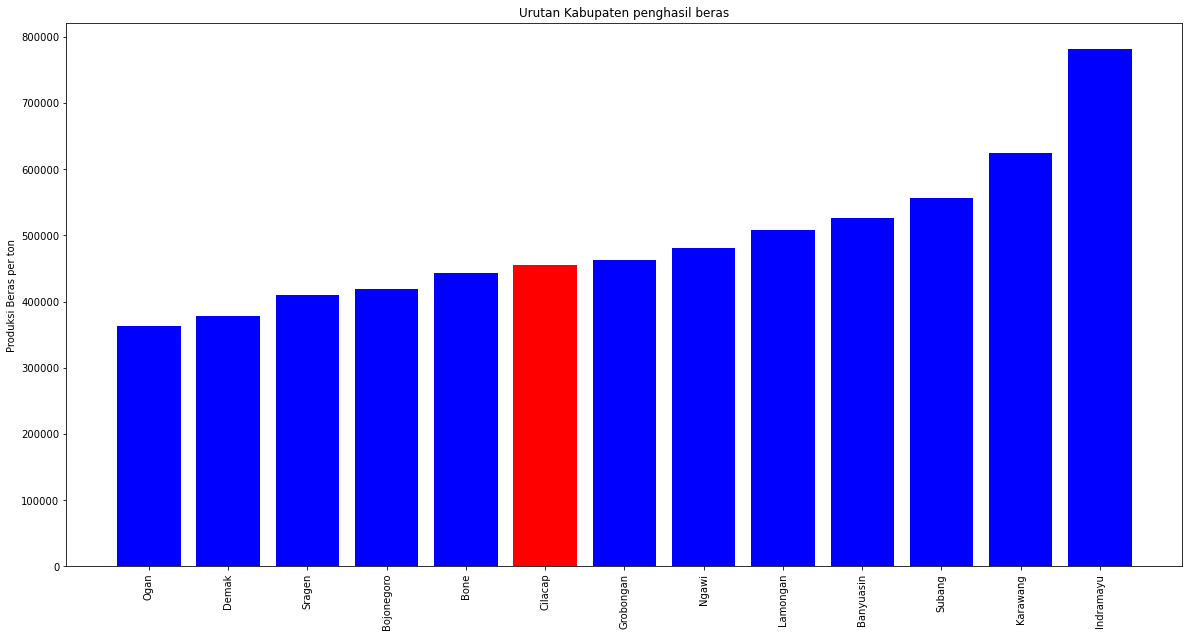

# 1. Import Necessary Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as mno

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import Library Confussion Matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# import 3 periode of season
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

ignore_data = ["8888"] # temporary, kalau ada ide buat ngolah nilai "8888", command ini bisa dihilangkan

df = pd.read_excel('dataset_iklim_cilacap_before_cleaning.xlsx', na_values = ignore_data)

In [3]:
# Quick data check

print(f"DataFrame shape : {df.shape}\n")
print(f"DataFrame columns: \n{df.columns}\n")
print(f"Columns type: {df.dtypes}")

df.head(3)

DataFrame shape : (547, 11)

DataFrame columns: 
Index(['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car'],
      dtype='object')

Columns type: Tanggal     object
Tn         float64
Tx         float64
Tavg       float64
RH_avg     float64
RR         float64
ss         float64
ff_x       float64
ddd_x      float64
ff_avg     float64
ddd_car     object
dtype: object


,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-10-2018,23.0,30.4,27.2,83.0,NaN,3.2,5.0,140.0,2.0,E
1,02-10-2018,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N
2,03-10-2018,25.0,30.4,27.2,80.0,NaN,8.9,7.0,150.0,3.0,E


In [4]:
# Quick data prep

# kita ingin mengolah dataset ini di domain timeseries
from datetime import datetime
df['datetime'] = [datetime.strptime(x,'%d-%m-%Y') for x in df['Tanggal']] # change string 'Tanngal' to timeseries format

# change datetime as index; 
df = df.set_index('datetime')
df.drop('Tanggal', axis=1, inplace=True)

# change 'ddd_car' to categorical
df['ddd_car'] = pd.Categorical(df.ddd_car)

# renaming columns
df.rename(columns={"RR": "curah_hujan", "Tavg": "temp_avg", "RH_avg": "humid_avg", 
                   "ss": "sun_expo", "ff_x": "wind_max", "ff_avg": "wind_avg", "Tn": "temp_min", 
                   "Tx": "temp_max", "ddd_car": "wind_dir", "ddd_x": "wind_dir_max"}, inplace=True)



# Menambahkan kolom 'Year', 'Month', 'Weekday' untuk mempermudah visualisasi dan statiscical need
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

In [5]:
# Dividing 1 dataset to 3 periode (just for easier visualization & statistical description)
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

df_periode1 = df.loc['2018-10-01':'2019-03-01']
df_periode2 = df.loc['2019-10-01':'2020-03-01']
df_periode3 = df.loc['2020-10-01':'2021-03-01']

In [6]:
df_periode1.head(3)

,temp_min,temp_max,temp_avg,humid_avg,curah_hujan,sun_expo,wind_max,wind_dir_max,wind_avg,wind_dir,Year,Month,Weekday
datetime,,,,,,,,,,,,,
2018-10-01,23.0,30.4,27.2,83.0,NaN,3.2,5.0,140.0,2.0,E,2018,10,0
2018-10-02,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N,2018,10,1
2018-10-03,25.0,30.4,27.2,80.0,NaN,8.9,7.0,150.0,3.0,E,2018,10,2


# 2. Exploratory Data Analysis

In [7]:
#### Curah Hujan

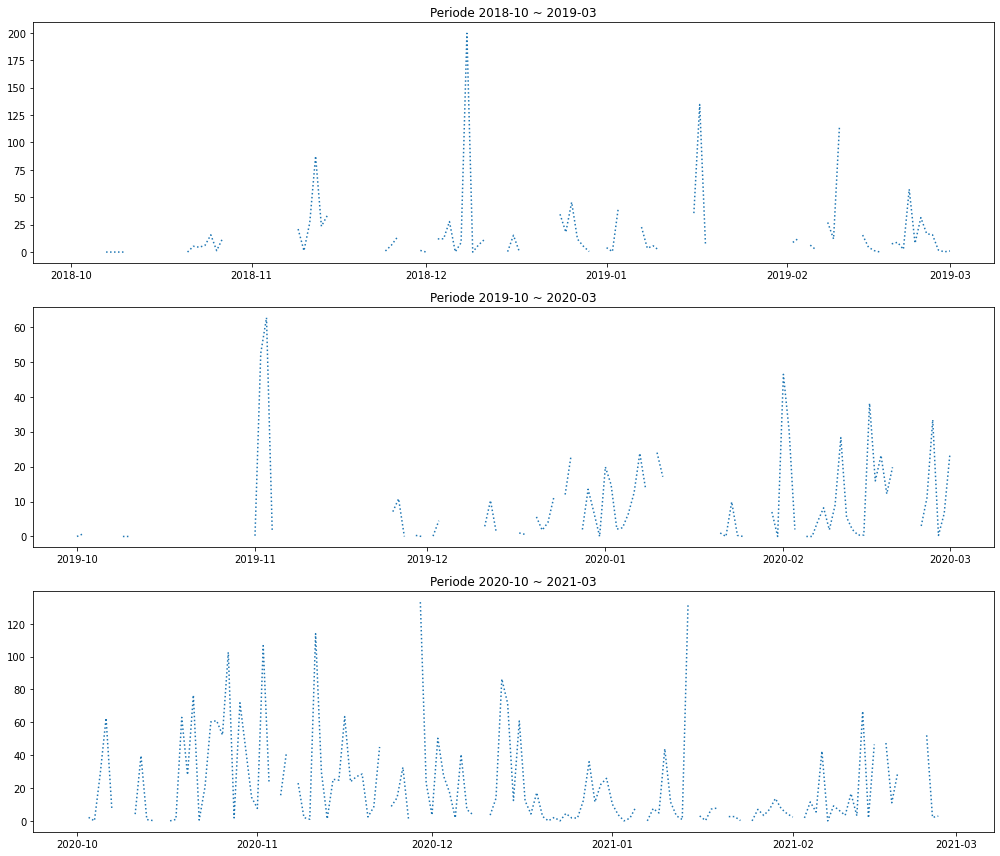

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,12))

axes[0].plot(df_periode1['curah_hujan'], linestyle=':')
axes[0].set_title('Periode 2018-10 ~ 2019-03')

axes[1].plot(df_periode2['curah_hujan'], linestyle=':')
axes[1].set_title('Periode 2019-10 ~ 2020-03')

axes[2].plot(df_periode3['curah_hujan'], linestyle=':')
axes[2].set_title('Periode 2020-10 ~ 2021-03')

plt.tight_layout()

##### Curah hujan per periode

In [9]:
# Note : Urutan bulan boxplots dibawah dimulai dari yang terkecil ke terbesar. Keep that in mind when analyzing.
# Mau diubah ke 10-11-12-01-02-03 tapi masih belum bisa

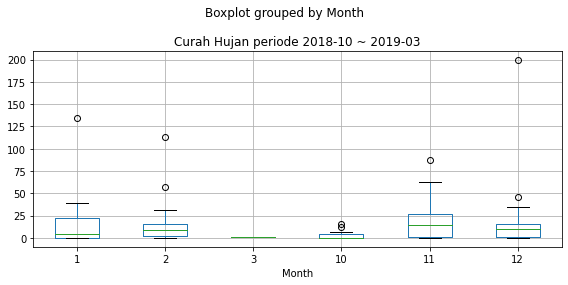

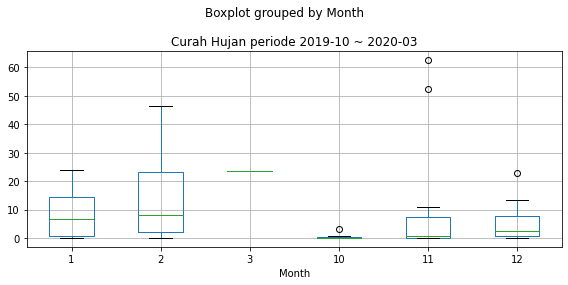

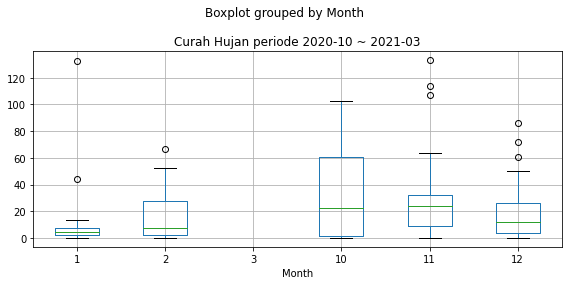

In [10]:
df_periode1.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2018-10 ~ 2019-03')
plt.tight_layout()

df_periode2.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2019-10 ~ 2020-03')
plt.tight_layout()

df_periode3.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2020-10 ~ 2021-03')
plt.tight_layout()


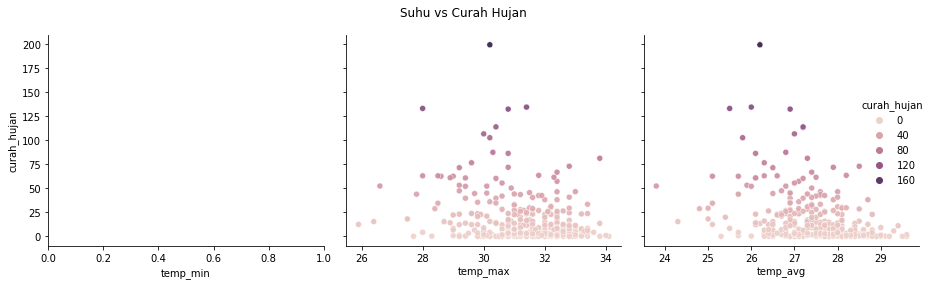

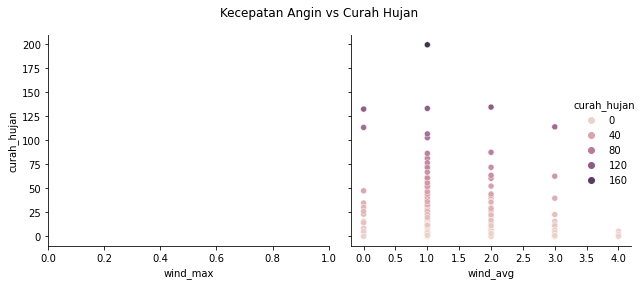

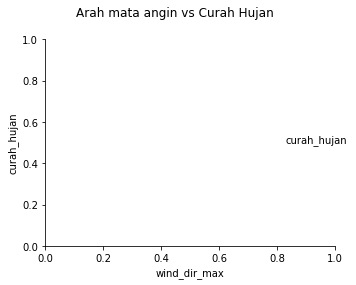

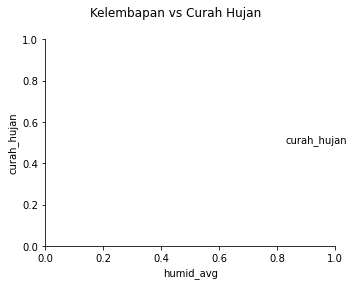

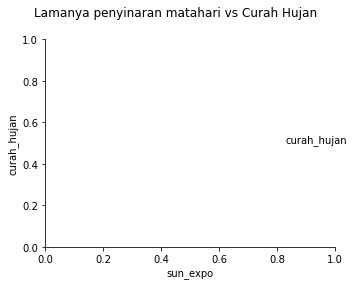

In [11]:
# coba

def pp(judul, *args):
    sns.pairplot(df, x_vars=args, y_vars=['curah_hujan'], height=4, aspect=1, kind='scatter', plot_kws={'alpha':0.9}, hue='curah_hujan')
    plt.suptitle(judul)
    plt.tight_layout()
    plt.show()
    
pp('Suhu vs Curah Hujan', 'temp_min', 'temp_max', 'temp_avg')
pp('Kecepatan Angin vs Curah Hujan', 'wind_max', 'wind_avg')
pp('Arah mata angin vs Curah Hujan', 'wind_dir_max')
pp('Kelembapan vs Curah Hujan', 'humid_avg')
pp('Lamanya penyinaran matahari vs Curah Hujan', 'sun_expo')

## Show Missing value in matrix

<AxesSubplot:>

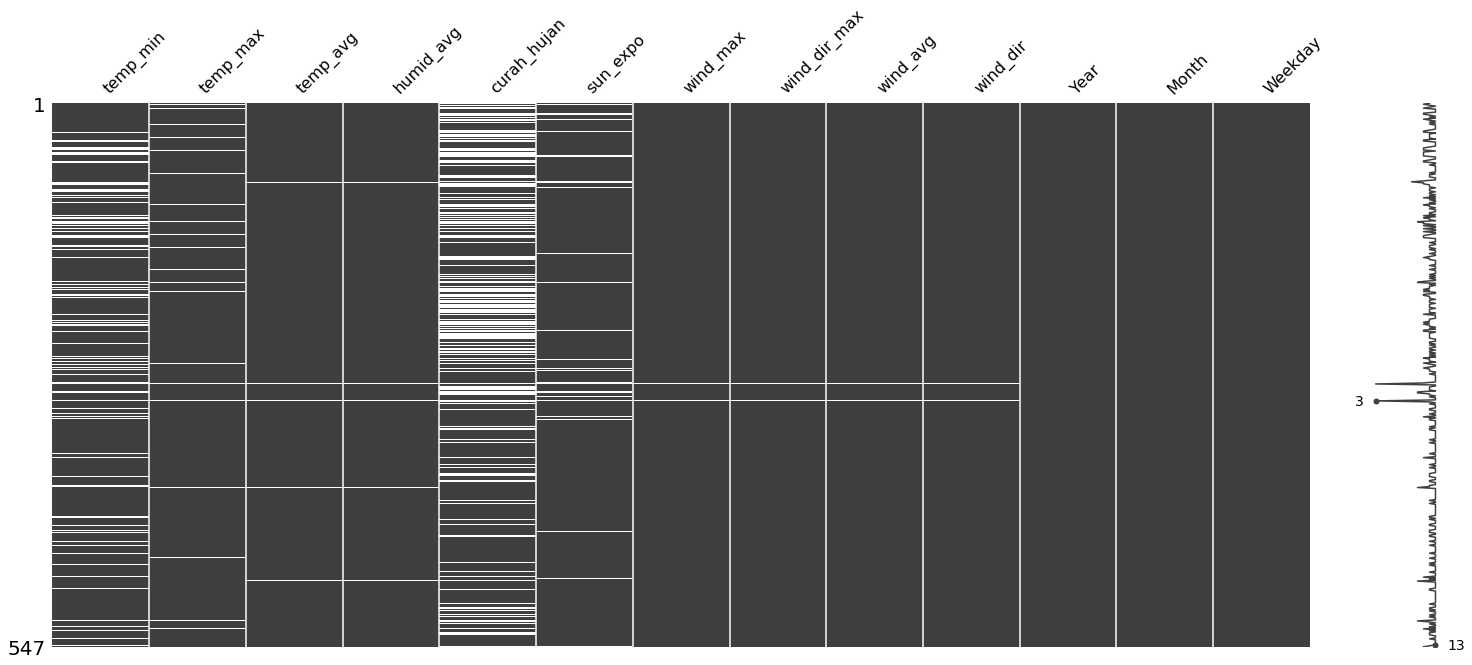

In [12]:
import missingno

missingno.matrix(df)

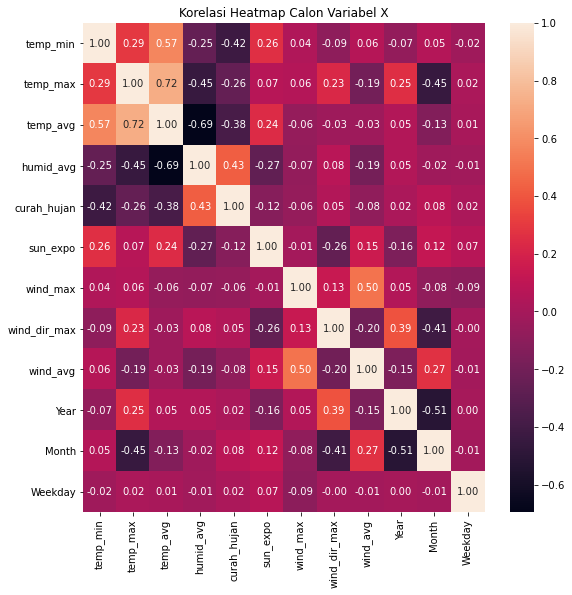

In [13]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr() ,annot=True ,fmt=".2f").set_title("Korelasi Heatmap Calon Variabel X")
plt.show()

# 3. Data Preparation (data cleaning)

In [14]:
#missing data

df.isnull().sum()

temp_min         87
temp_max         20
temp_avg          5
humid_avg         5
curah_hujan     172
sun_expo         27
wind_max          2
wind_dir_max      2
wind_avg          2
wind_dir          2
Year              0
Month             0
Weekday           0
dtype: int64

In [15]:
# mengganti missing values di kolom curah_hujan dengan 0
df_filtered_1 = df.replace({'curah_hujan': np.nan},0)
df_filtered_1.head()

,temp_min,temp_max,temp_avg,humid_avg,curah_hujan,sun_expo,wind_max,wind_dir_max,wind_avg,wind_dir,Year,Month,Weekday
datetime,,,,,,,,,,,,,
2018-10-01,23.0,30.4,27.2,83.0,0.0,3.2,5.0,140.0,2.0,E,2018,10,0
2018-10-02,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N,2018,10,1
2018-10-03,25.0,30.4,27.2,80.0,0.0,8.9,7.0,150.0,3.0,E,2018,10,2
2018-10-04,23.0,29.9,27.1,75.0,0.0,8.1,4.0,140.0,2.0,SE,2018,10,3
2018-10-05,22.0,29.8,25.4,82.0,0.0,10.2,4.0,140.0,2.0,SE,2018,10,4


In [16]:
# menghapus missing values perbaris di kolom curah hujan
df_filtered_2 = df.dropna(subset=['curah_hujan'])
df_filtered_2.head()

,temp_min,temp_max,temp_avg,humid_avg,curah_hujan,sun_expo,wind_max,wind_dir_max,wind_avg,wind_dir,Year,Month,Weekday
datetime,,,,,,,,,,,,,
2018-10-02,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N,2018,10,1
2018-10-04,23.0,29.9,27.1,75.0,0.0,8.1,4.0,140.0,2.0,SE,2018,10,3
2018-10-07,25.0,31.7,26.9,84.0,0.0,9.5,6.0,110.0,3.0,E,2018,10,6
2018-10-08,25.0,29.4,26.4,87.0,0.0,9.4,5.0,140.0,3.0,SE,2018,10,0
2018-10-09,25.0,29.8,27.2,82.0,0.0,9.2,6.0,140.0,2.0,SE,2018,10,1


In [17]:
df_filtered_1.isnull().sum()

temp_min        87
temp_max        20
temp_avg         5
humid_avg        5
curah_hujan      0
sun_expo        27
wind_max         2
wind_dir_max     2
wind_avg         2
wind_dir         2
Year             0
Month            0
Weekday          0
dtype: int64

In [18]:
df_filtered_2.isnull().sum()

temp_min        46
temp_max         9
temp_avg         2
humid_avg        2
curah_hujan      0
sun_expo        12
wind_max         0
wind_dir_max     0
wind_avg         0
wind_dir         0
Year             0
Month            0
Weekday          0
dtype: int64

In [19]:
# Data check

print(f"Original df shape : {df.shape}\n")
print(f"df_filtered_1 shape : \n{df_filtered_1.shape}\n")
print(f"df_filtered_2 shape : {df_filtered_2.shape}")

Original df shape : (547, 13)

df_filtered_1 shape : 
(547, 13)

df_filtered_2 shape : (375, 13)


<AxesSubplot:>

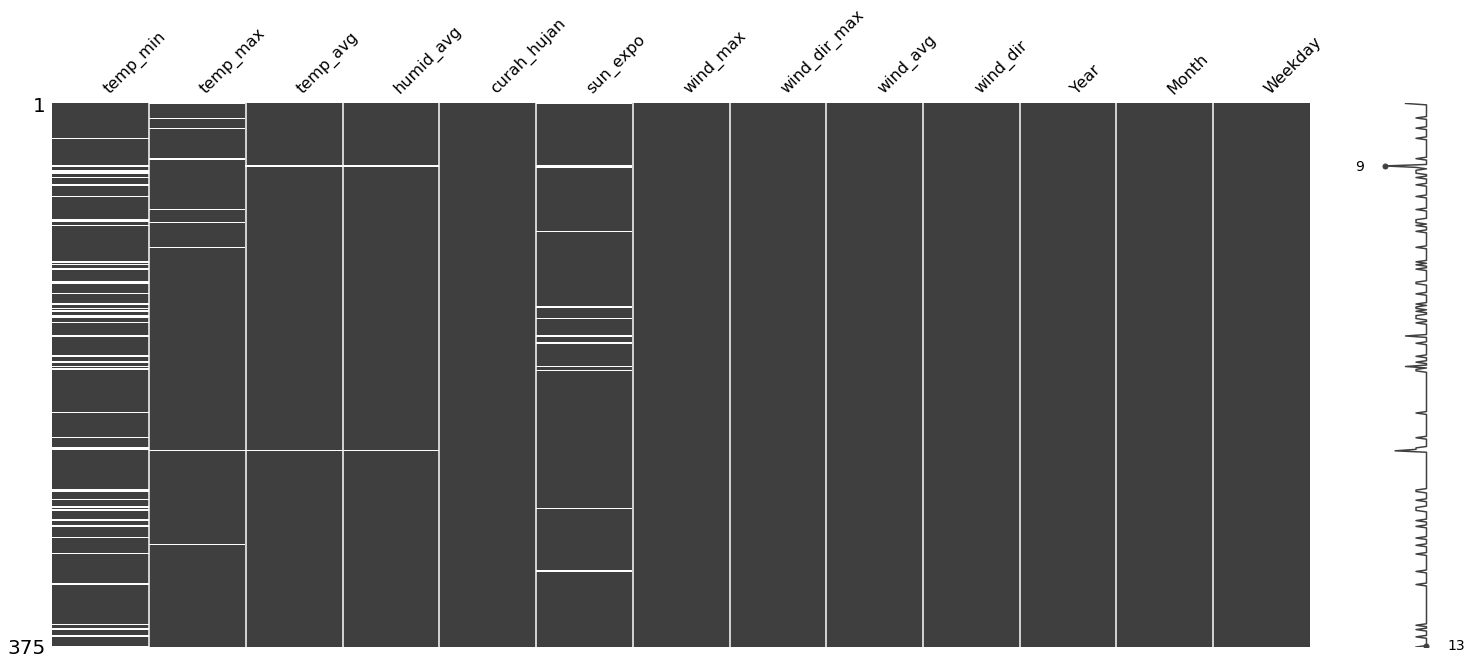

In [20]:
missingno.matrix(df_filtered_2)

# 4. Before Modeling

In [21]:
# sementara drop all missing value
df_filtered_2 = df_filtered_2.dropna()
df_filtered_2.isnull().sum()

temp_min        0
temp_max        0
temp_avg        0
humid_avg       0
curah_hujan     0
sun_expo        0
wind_max        0
wind_dir_max    0
wind_avg        0
wind_dir        0
Year            0
Month           0
Weekday         0
dtype: int64

## 4.1 Splitting DataFrame into X and y

In [22]:
# Disini kita menggunakan 5 fitur
X = df_filtered_2.loc[:, ['temp_min', 'temp_max', 'temp_avg', 'humid_avg', 'sun_expo']]
y = df_filtered_2.loc[:, 'curah_hujan']

# Karena banyak tools yang mewajibkan kita menggunakan numpy array, maka kita ubah X dan y menjadi array
X_array = X.to_numpy()
y_array = y.to_numpy()

# Karena feature scaling expect 2-d array, kita perlu mengubah y menjadi 2-d dulu
y_array = y_array.reshape(len(y), 1)

## 4.2 Train-Test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, train_size = 0.8, random_state = 1)

## 4.3 Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler() # We cannot use same scaler for both X and y
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train).ravel()

# We also need to transform test set
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)

# Kalau mau ngeluarin real-result, jangan lupa gunakan inverse_transform

# 5. Modeling

## 5.1 Regresi Linear (Single Variable)

Untuk melakukan regresi linear, kita perlu mengetahui independent variable mana yang paling berpengaruh ke dependent variabel (curah_hujan)

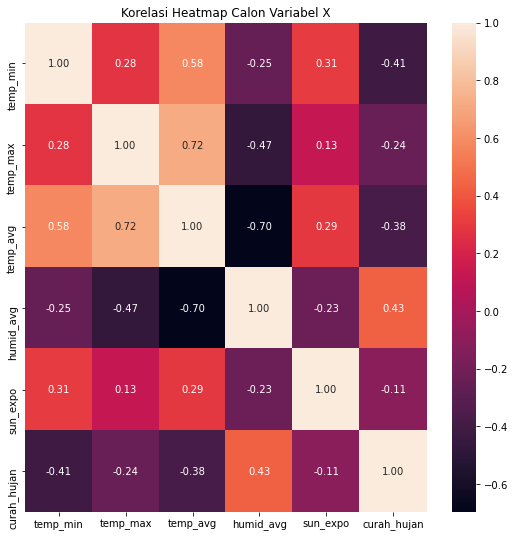

In [25]:
plt.figure(figsize=(9, 9))
sns.heatmap(pd.concat([X, y], axis=1).corr() ,annot=True ,fmt=".2f").set_title("Korelasi Heatmap Calon Variabel X")
plt.show()

Dari hasil visualisasi diatas, dapat diketahui humid_avg memiliki korelasi yang tinggi terhadap kolom curah_hujan / variabel dependent sehingga kita mengambil fitur/kolom humid_avg untuk di training

    Independent variabel(X) adalah humid_avg.
    Dependent variabel(y) adalah curah_hujan.



In [26]:
# Kita ambil humid_avg saja dari train_test data, oleh karena itu kita menggunakan X_train[:, 3]

from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train[:, 3].reshape(-1, 1), y_train)

LinearRegression()

In [27]:
print(linear_reg.coef_)
print(linear_reg.intercept_)

[0.43023965]
-6.903884277798438e-16


In [28]:
linear_reg.score(X_test[:, 3].reshape(-1, 1), y_test)

0.19014687908951444

Model kita mendapatkan accuracy score sebesar 19.01%

In [29]:
# Calculate the training accuracy

acc_linear_reg = round(linear_reg.score(X_train[:, 3].reshape(-1, 1), y_train) * 100, 2)
acc_linear_reg

18.51

Text(0.5, 1.0, 'Plot Kelembapan rata-rata vs Curah Hujan (scaled)')

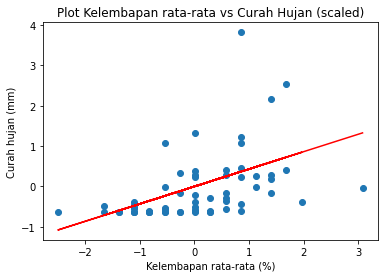

In [30]:
y_pred = linear_reg.predict(X_test[:, 3].reshape(-1, 1))

plt.scatter(X_test[:, 3], y_test)
plt.plot(X_test[:, 3], y_pred, c='r')
plt.xlabel('Kelembapan rata-rata (%)')
plt.ylabel('Curah hujan (mm)')
plt.title('Plot Kelembapan rata-rata vs Curah Hujan (scaled)')

Text(0.5, 1.0, 'Plot Kelembapan rata-rata vs Curah Hujan (real data)')

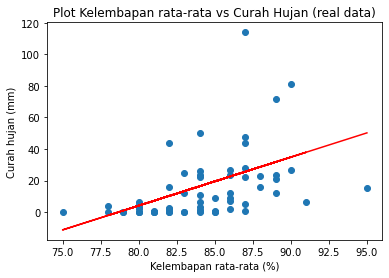

In [31]:
y_pred = linear_reg.predict(X_test[:, 3].reshape(-1, 1))

plt.scatter(sc_X.inverse_transform(X_test)[:, 3], sc_y.inverse_transform(y_test))
plt.plot(sc_X.inverse_transform(X_test)[:, 3], sc_y.inverse_transform(y_pred), c='r')
plt.xlabel('Kelembapan rata-rata (%)')
plt.ylabel('Curah hujan (mm)')
plt.title('Plot Kelembapan rata-rata vs Curah Hujan (real data)')

In [32]:
# Model Eval

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Residual sum of squares (MSE): {mean_squared_error(y_test, y_pred)}")

y_pred = linear_reg.predict((X_test)[:, 3].reshape(-1, 1))
linear_r2 = r2_score(y_test, y_pred)
print(f"R2-score: {linear_r2}")

Mean absolute error: 0.5225105435280809
Residual sum of squares (MSE): 0.5659730809563562
R2-score: 0.19014687908951444


## 5.2 Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

# Dengan menggunakan hasil train_test_split di Bab ke IV, kita langsung dapat menggunakan hasil splitting data tersebut

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# Model Eval

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Residual sum of squares (MSE): {mean_squared_error(y_test, y_pred)}")

y_pred = dt_reg.predict(X_test)
dt_r2 = r2_score(y_test, y_pred)
print(f"R2-score: {dt_r2}")

Mean absolute error: 0.5225105435280809
Residual sum of squares (MSE): 0.5659730809563562
R2-score: -1.819308371983528


## 5.3 Random Forest Regression

In [35]:
# Import Library Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
# Model Eval

print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Residual sum of squares (MSE): {mean_squared_error(y_test, y_pred)}")

y_pred = rf_reg.predict(X_test)
rf_r2 = r2_score(y_test, y_pred)
print(f"R2-score: {rf_r2}")

Mean absolute error: 0.8099057893096611
Residual sum of squares (MSE): 1.9702988162392183
R2-score: 0.15139748373208428


## 6. Model evaluation and hyperparameter tuning

## 6.1 Mean Squared Error

In [38]:
models = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest Regression'],
                       'Score': [dt_r2, rf_r2]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest Regression,0.151397
1,Decision Tree,-1.819308


## 6.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [39]:
# Create a list which contains regressors

regressors = []

regressors.append(DecisionTreeRegressor())
regressors.append(RandomForestRegressor())


len(regressors)

2

In [40]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for regressor in regressors:
    cv_results.append(cross_val_score(regressor, X_train, y_train, scoring = 'r2', cv = 10))

In [41]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [42]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Decision Tree', 'Random Forest Regression']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,-0.199880,0.580302,Random Forest Regression
1,-2.089836,3.461564,Decision Tree
